In [8]:
import sys
from pathlib import Path
import os
import warnings
import time
import re
SPIKECOUNTER_PATH = os.getenv("SPIKECOUNTER_PATH")
ANALYSIS_OUTPUT_ROOTDIR = os.getenv("ANALYSIS_OUTPUT_ROOTDIR")
DATA_ROOTDIR = os.getenv("DATA_ROOTDIR")
sys.path.append(SPIKECOUNTER_PATH)
import matplotlib.pyplot as plt
from matplotlib import patches
import scipy.signal as signal
import scipy.interpolate as interpolate
import scipy.io as scio
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.colors as colors
import pickle
import scipy.optimize as optimize
from parse import *
import colorcet as cc
from cycler import cycler
biopubs_style = os.path.join(os.getenv("SPIKECOUNTER_PATH"), "config", "bio_publications.mplstyle")
plt.style.use(
    biopubs_style
)

In [15]:
output_datadir = Path(
    ANALYSIS_OUTPUT_ROOTDIR,
    "2022 First Heartbeat_Submitted",
    "Figures/Data/"
)
figdir = "/n/cohen_lab/Lab/Papers/2022 First Heartbeat/Supplementary Figures/QIF"

In [3]:
def onecell_de(t, x, f):
    if x > 5.5:
        dxdt = -x/dt
    else:
        dxdt = x**2 + rest + sigma*np.random.normal()
    return dxdt

In [4]:
def onecell_euler(de, ts, dt, y0, f):
    t = np.arange(ts[0], ts[1], step=dt)
    y = np.zeros((len(t), len(y0)))
    y[0,:] = y0
    for i in range(1,len(t)):
        y[i,:] = y[i-1,:] + de(t[i], y[i-1,:], f)*dt
    return t, y

In [25]:
y0 = [0.8]

In [26]:
rest = -0.5
dt = 0.01
sigma = 0
t, y = onecell_euler(onecell_de, [0,100], dt, y0, 0)

In [43]:
rest = -0.5
dt = 0.01
sigma = 0
t, y = onecell_euler(onecell_de, [0,100], dt, y0, 0)

In [41]:
rest = -0.5
dt = 0.01
sigma = 0
t2, y2 = onecell_euler(onecell_de, [0,100], dt, [0.6], 0)

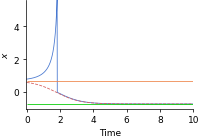

In [44]:
fig1, ax1 = plt.subplots(figsize=(3,2))
ax1.plot(t,y, label=r"$x$")
ax1.plot(t2,y2, label=r"$x$", color="C3", linestyle="--")

ax1.hlines(np.sqrt(-rest), 0, 100, colors="C1", label="Threshold")
ax1.hlines(-np.sqrt(-rest), 0, 100, colors="C2", label="Rest")
ax1.set_xlabel("Time")
ax1.set_ylabel(r"$x$")
# ax1.legend(loc="upper right")
ax1.set_xlim(-0.05, 10)
ax1.set_ylim(-1, 5.6)
plt.savefig(os.path.join(figdir, "excitable.svg"))

(-0.1, 1.0)

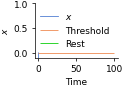

In [14]:
fig1, ax1 = plt.subplots(figsize=(1.5,1))
ax1.plot(t,y, label=r"$x$")
ax1.hlines(0, 0, 100, colors="C1", label="Threshold")
ax1.hlines(rest, 0, 100, colors="C2", label="Rest")
ax1.set_xlabel("Time")
ax1.set_ylabel(r"$x$")
ax1.legend(loc="upper right")
ax1.set_ylim(-0.1, 1)
# plt.tight_layout()

# plt.savefig("../all_widefield_data_new/LIF_example_trace_silent.svg")

In [62]:
rest = 0.1
dt = 0.01
sigma = 0
y0 = [0.8]
t, y = onecell_euler(onecell_de, [0,100], dt, y0, 0)

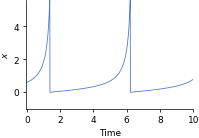

In [61]:
fig1, ax1 = plt.subplots(figsize=(3,2))
ax1.plot(t,y, label=r"$x$")
# ax1.plot(t2,y2, label=r"$x$", color="C3", linestyle="--")

# ax1.hlines(np.sqrt(-rest), 0, 100, colors="C1", label="Threshold")
# ax1.hlines(-np.sqrt(-rest), 0, 100, colors="C2", label="Rest")
ax1.set_xlabel("Time")
ax1.set_ylabel(r"$x$")
# ax1.legend(loc="upper right")
ax1.set_xlim(-0.05, 10)
ax1.set_ylim(-1, 5.6)
plt.savefig(os.path.join(figdir, "oscillatory.svg"))

In [85]:
rest = -0.01
dt = 0.002
sigma = 7

In [86]:
t, y = onecell_euler(onecell_de, [0,100], dt, y0, 0)

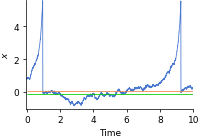

In [89]:
fig1, ax1 = plt.subplots(figsize=(3,2))
ax1.plot(t,y, label=r"$x$")
# ax1.plot(t2,y2, label=r"$x$", color="C3", linestyle="--")

ax1.hlines(np.sqrt(-rest), 0, 100, colors="C1", label="Threshold")
ax1.hlines(-np.sqrt(-rest), 0, 100, colors="C2", label="Rest")
ax1.set_xlabel("Time")
ax1.set_ylabel(r"$x$")
# ax1.legend(loc="upper right")
ax1.set_xlim(-0.05, 10)
ax1.set_ylim(-1, 5.6)
plt.savefig(os.path.join(figdir, "noisy.svg"))

Long trace

In [10]:
rest = -0.001
dt = 0.02
sigma = 1.89
y0 = [rest]
short_timescale_scaling = 1.4927431690592463

In [11]:
t, y = onecell_euler(onecell_de, [0,180*short_timescale_scaling], dt, y0, 0)

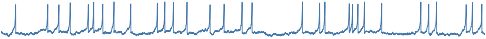

In [18]:
fig1, ax1 = plt.subplots(figsize=(7, 0.8))
ax1.plot(t/short_timescale_scaling,y)
ax1.set_axis_off()
ax1.set_xlim(0, 180)
plt.tight_layout()
plt.savefig(output_datadir/"Figure2"/"model_expt_trace_comparison_MODEL.svg")